# Visualizing Earnings Based On College Majors

### Goals:
- Explore how to use the pandas plotting functionality along with the Jupyter notebook interface in order to explore data quickly using visualizations
- Pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

### Dataset:
- With a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.
- Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

## Environnement setup

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


#### First exploration of the data

In [17]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [18]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [19]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


#### Drop rows with missing values. 
Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [20]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_counts = recent_grads.shape[0]
print(raw_data_count, cleaned_data_counts)

173 172


### Scatter Plots

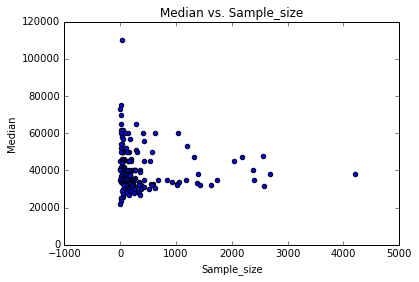

In [21]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Median vs. Sample_size')

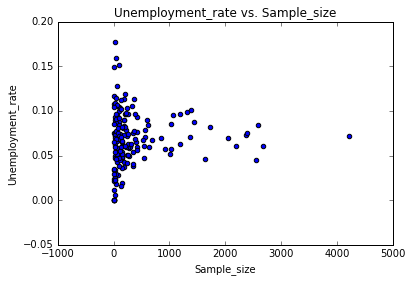

In [22]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs. Sample_size')

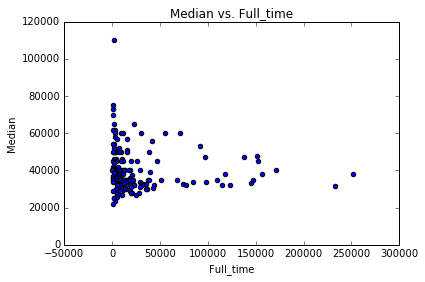

In [23]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median vs. Full_time')

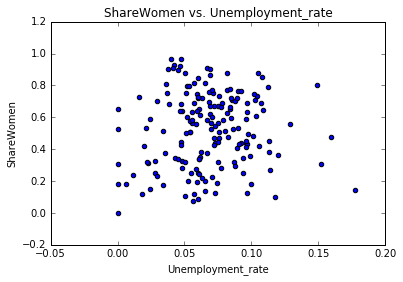

In [24]:
ax = recent_grads.plot(x='Unemployment_rate', y='ShareWomen', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

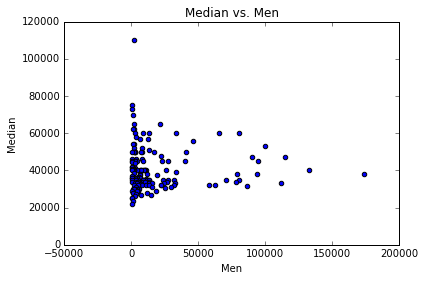

In [25]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Median vs. Men')

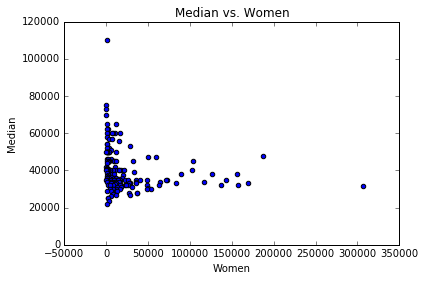

In [26]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Median vs. Women')

#### First conclusions:
- On the first plot: we can see that the samples with a more important size don't have a huge median salary (value in the average). So students in more popular majors don't make more money.
- On the last plot: except for majors with few women which aren't relevant values, the median salary is quite stable when the number of women gets higher.So, students that majored in subjects that were majority female don't make more money, their salary don't change.
- On the "Median vs. Full_time" plot, we can see that there isn't any obisous link between the number of full-time employees and median salary.

## Exploration of the distribution of values for differents columns

Note: The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. Series.plot() for a specific column & DataFrame.plot() for multiple columns. Scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

### Histograms

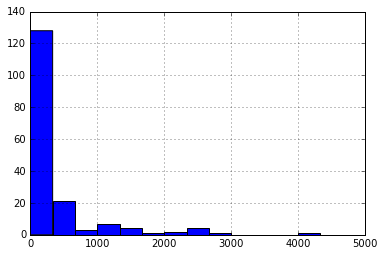

In [38]:
recent_grads['Sample_size'].hist(bins=15, range=(0,5000))

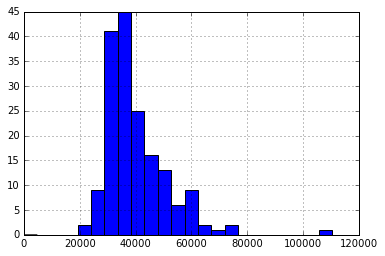

In [39]:
recent_grads['Median'].hist(bins=25, range=(0,120000))

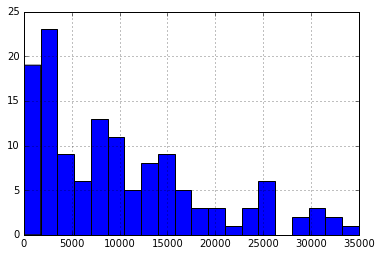

In [48]:
recent_grads['Employed'].hist(bins=20, range=(0,35000))

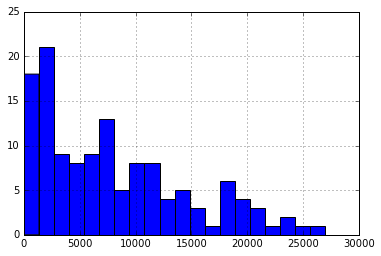

In [47]:
recent_grads['Full_time'].hist(bins=20, range=(0,27000))

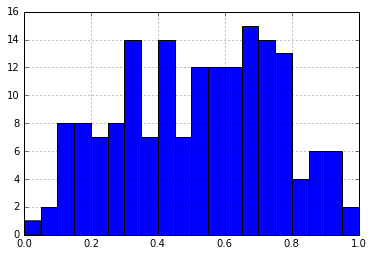

In [46]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,1))

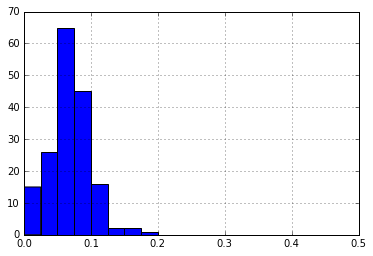

In [49]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.5))

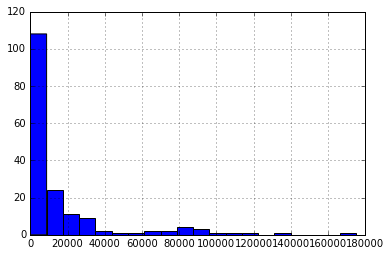

In [50]:
recent_grads['Men'].hist(bins=20, range=(0,175000))

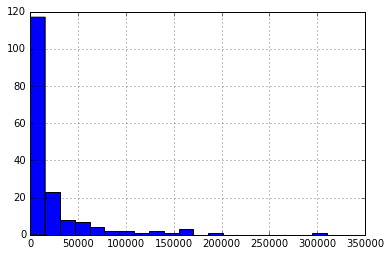

In [51]:
recent_grads['Women'].hist(bins=20, range=(0,310000))

##### Side note : other solution if we wanted to have all the plots on the same figure:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(7,25))

for item in range(1, len(cols)+1):

    ax = fig.add_subplot(8,1,item)
    ax = recent_grads[cols[item-1]].plot(kind='hist', rot=20)
    ax.set_title(cols[item-1])

### Conclusions:
- On the rigth of the last two histograms, we can see that there are very few majors with predominantly males. The same conclusion apply with majors that are predominantly female.
- The most common median salary range is arount USD 40 000.

## Exploration of potential relationships and distributions simultaneously

##### Note:
Above, we've created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions 

In [57]:
from pandas.plotting import scatter_matrix

### Scatter matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c722f2e8>,
      dtype=object)

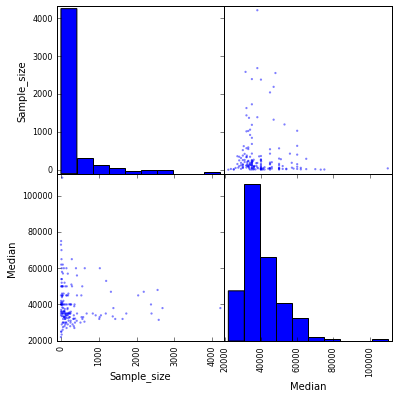

In [58]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c704f198>,
      dtype=object)

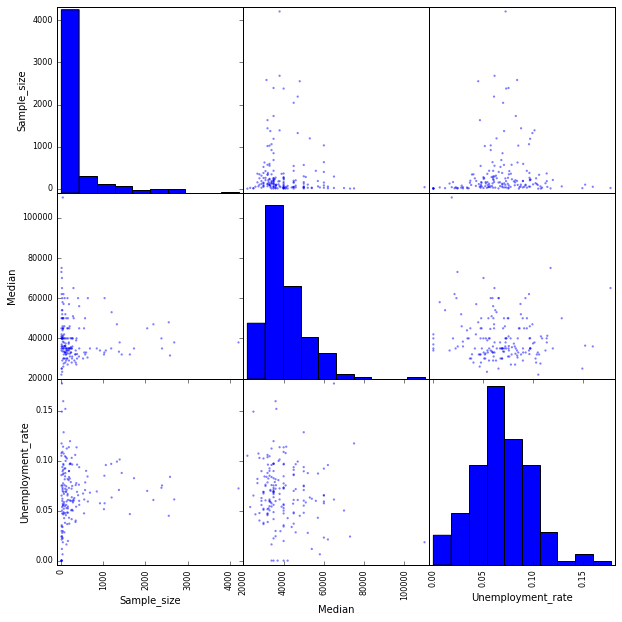

In [59]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Conclusion:
Do students in more popular majors make more money?
Do students that majored in subjects that were majority female make more money?
Is there any link between the number of full-time employees and median salary?

What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?

### Bar Plots

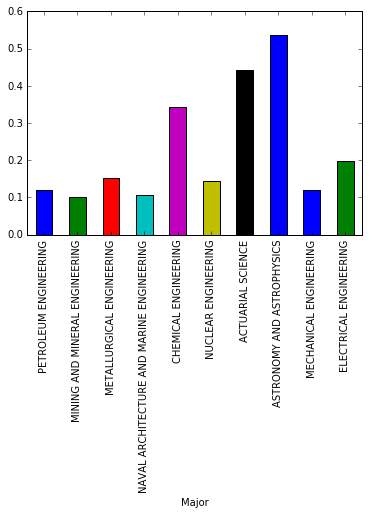

In [60]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

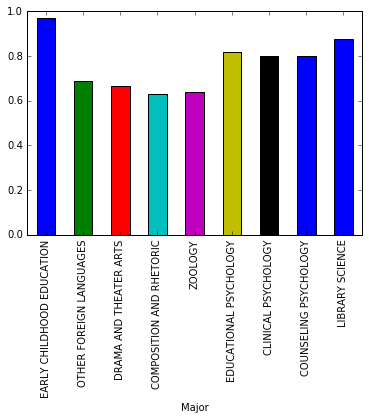

In [61]:
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

### Summary
* In this guided project, I learned how to use the plotting tools built into pandas to explore data on job outcomes. Link to the documentation on plotting in pandas: http://pandas.pydata.org/pandas-docs/stable/visualization.html (there is built in support for many more plots.)
* Concepts explored: pandas, matplotlib, histograms, bar charts, scatterplots, scatter matrices
* Functions, methods, and properties used: .plot(), scatter_matrix(), hist(), iloc[], .head(), .tail(), .describe()

### Further investigations
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.